In [0]:
# Install Java, Spark, and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
from pyspark import SparkFiles
spark = SparkSession.builder.appName("Q4").getOrCreate()

In [24]:
# Load in user_data.csv from S3 into a DataFrame
import os
os.environ['KAGGLE_USERNAME'] = "vlr324" # username from the json file
os.environ['KAGGLE_KEY'] = "e5a1d0a21a41de581507fd5440fcbb12" # key from the json file
!kaggle datasets download -d paultimothymooney/breast-histopathology-images # api copied from kaggle

breast-histopathology-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import zipfile

zipref = zipfile.ZipFile('breast-histopathology-images.zip', 'r')
zipref.extractall()
zipref.close()


In [26]:
!ls "/content/"

10253  12242  12895  13459  15472  8916  9225
10254  12626  12896  13460  15473  8917  9226
10255  12748  12897  13461  15510  8918  9227
10256  12749  12898  13462  15512  8950  9228
10257  12750  12900  13591  15513  8951  9250
10258  12751  12901  13613  15514  8955  9254
10259  12752  12905  13616  15515  8956  9255
10260  12810  12906  13617  15516  8957  9256
10261  12811  12907  13666  15632  8959  9257
10262  12817  12908  13687  15633  8974  9258
10264  12818  12909  13688  15634  8975  9259
10268  12819  12910  13689  15839  8980  9260
10269  12820  12911  13691  15840  8984  9261
10272  12821  12929  13692  15902  9022  9262
10273  12822  12930  13693  15903  9023  9265
10274  12823  12931  13694  16014  9029  9266
10275  12824  12932  13916  16085  9035  9267
10276  12826  12933  14078  16165  9036  9290
10277  12867  12934  14079  16166  9037  9291
10278  12868  12935  14081  16167  9041  9319
10279  12869  12947  14082  16531  9043  9320
10282  12870  12948  14153  16532 

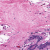

In [27]:
from IPython.display import Image
Image('/content/10253/0/10253_idx5_x1001_y1001_class0.png')

In [34]:
import glob
local_path = "/content/"
images = glob.glob(local_path + '*/*/*.png')
len(images)


277524